# **1. Complaints Data Analysis**

The dataset contains 50 lakh rows of which 10 lakh rows are chosen for this analysis to keep computation time and resources user friendly


In [11]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [5]:
#reading the dataframe
df=pd.read_csv('/newdf.csv',low_memory=False)

In [6]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-23,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",ME,04005,NaN,Consent not provided,Web,2024-01-23,Closed with non-monetary relief,Yes,NaN,8206605.0
1,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33311,NaN,Other,Web,2024-01-24,Closed with non-monetary relief,Yes,NaN,8211390.0
2,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,175XX,NaN,Other,Web,2024-01-24,Closed with non-monetary relief,Yes,NaN,8211362.0
3,2024-01-23,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,79907,NaN,Consent provided,Web,2024-01-23,Closed with non-monetary relief,Yes,NaN,8210433.0
4,2024-01-23,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,I have observed several deviations from mandat...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10075,NaN,Consent provided,Web,2024-01-23,Closed with non-monetary relief,Yes,NaN,8209430.0


In [17]:
df.info()#getiing the general idea of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72323 entries, 0 to 72322
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 72323 non-null  object 
 1   Product                       72323 non-null  object 
 2   Sub-product                   72323 non-null  object 
 3   Issue                         72322 non-null  object 
 4   Sub-issue                     71403 non-null  object 
 5   Consumer complaint narrative  4601 non-null   object 
 6   Company public response       10201 non-null  object 
 7   Company                       72322 non-null  object 
 8   State                         72154 non-null  object 
 9   ZIP code                      72322 non-null  object 
 10  Tags                          3033 non-null   object 
 11  Consumer consent provided?    15027 non-null  object 
 12  Submitted via                 72322 non-null  object 
 13  D

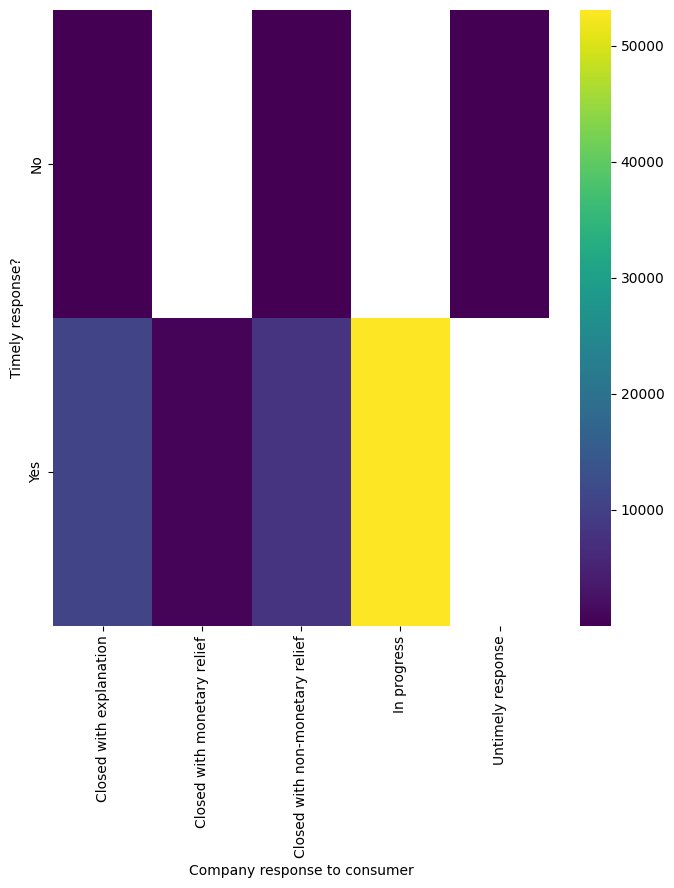

In [13]:
# @title Company response to consumer vs Timely response?


plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Timely response?'].value_counts()
    for x_label, grp in df.groupby('Company response to consumer')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Company response to consumer')
_ = plt.ylabel('Timely response?')

The graph explains the response from the company and analyses wether the response is timely or not


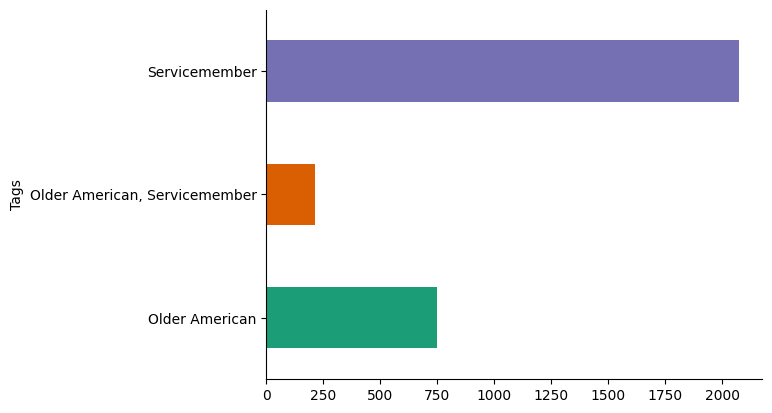

In [14]:
# @title Tags

df.groupby('Tags').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The graph analyses the tags column and finds the number of different type of customer based on the tags

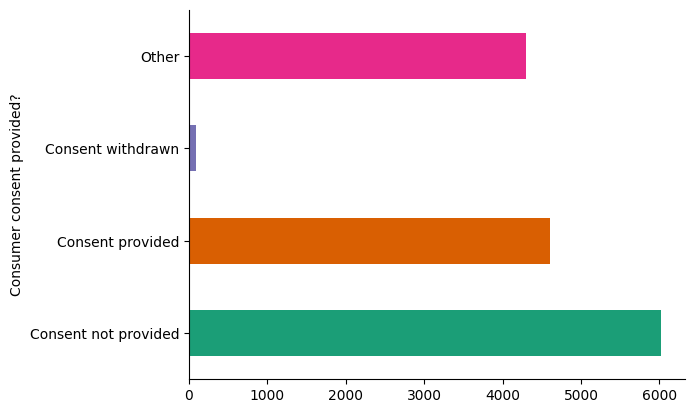

In [15]:
# @title Consumer consent provided?

df.groupby('Consumer consent provided?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

This graph analyses the consent provided column and visualizes the various types of consents given by the customer

Complaint resolution by company response

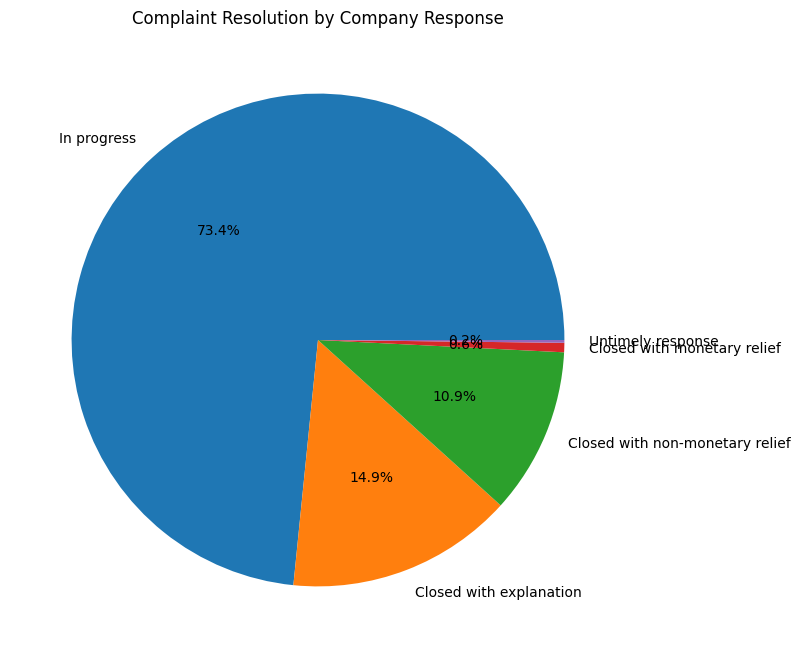

In [16]:
# @title Complaint resolution by company response
response_counts = df['Company response to consumer'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%')
plt.title('Complaint Resolution by Company Response')
plt.show()

The pie chart explains the resolutions provided by the company to the issues raised by the customers

# 2. longest continuous increasing subsequence

Given an unsorted array of integers, find the length of the longest continuous
increasing subsequence (subarray).
Example 1:
Input: [1,3,5,4,7]
Output: 3
Example 2:
Input: [2,2,2,2,2]
Output: 1

In [21]:
def lon_seq(nums):
  n = len(nums)
  longest_length = 0

  for i in range(n):
    current_length = 1
    for j in range(i + 1, n):
      if nums[j] > nums[i]:
        current_length += 1
    longest_length = max(longest_length, current_length)

  return longest_length

In [23]:
nums = [2,2,2,2,2]
length = lon_seq(nums)
print("Length of LIS:", length)

Length of LIS: 1


# 3.largest number.

Given a list of non negative integers, arrange them such that they form the largest
number.

 Example 1:
 Input: [10,2]
 Output: &quot;210&quot;
 Example 2:

 Input: [3,30,34,5,9]
 Output: &quot;9534330&quot;

In [29]:
from functools import cmp_to_key

nums = [3, 30, 34, 5, 9]
nums.sort(key=cmp_to_key(lambda a, b: int(str(b) + str(a)) - int(str(a) + str(b))))
result = ''.join(map(str, nums))

print(result)


9534330


# servlet-name and servlet-class

In [32]:
jsondata={"web-app": {
    "servlet": [
      {
        "servlet-name": "cofaxCDS",
        "servlet-class": "org.cofax.cds.CDSServlet",
        "init-param": {
          "configGlossary:installationAt": "Philadelphia, PA",
          "configGlossary:adminEmail": "ksm@pobox.com",
          "configGlossary:poweredBy": "Cofax",
          "configGlossary:poweredByIcon": "/images/cofax.gif",
          "configGlossary:staticPath": "/content/static",
          "templateProcessorClass": "org.cofax.WysiwygTemplate",
          "templateLoaderClass": "org.cofax.FilesTemplateLoader",
          "templatePath": "templates",
          "templateOverridePath": "",
          "defaultListTemplate": "listTemplate.htm",
          "defaultFileTemplate": "articleTemplate.htm",
          "useJSP": "false",
          "jspListTemplate": "listTemplate.jsp",
          "jspFileTemplate": "articleTemplate.jsp",
          "cachePackageTagsTrack": 200,
          "cachePackageTagsStore": 200,
          "cachePackageTagsRefresh": 60,
          "cacheTemplatesTrack": 100,
          "cacheTemplatesStore": 50,
          "cacheTemplatesRefresh": 15,
          "cachePagesTrack": 200,
          "cachePagesStore": 100,
          "cachePagesRefresh": 10,
          "cachePagesDirtyRead": 10,
          "searchEngineListTemplate": "forSearchEnginesList.htm",
          "searchEngineFileTemplate": "forSearchEngines.htm",
          "searchEngineRobotsDb": "WEB-INF/robots.db",
          "useDataStore": "true",
          "dataStoreClass": "org.cofax.SqlDataStore",
          "redirectionClass": "org.cofax.SqlRedirection",
          "dataStoreName": "cofax",
          "dataStoreDriver": "com.microsoft.jdbc.sqlserver.SQLServerDriver",
          "dataStoreUrl": "jdbc:microsoft:sqlserver://LOCALHOST:1433;DatabaseName=goon",
          "dataStoreUser": "sa",
          "dataStorePassword": "dataStoreTestQuery",
          "dataStoreTestQuery": "SET NOCOUNT ON;select test='test';",
          "dataStoreLogFile": "/usr/local/tomcat/logs/datastore.log",
          "dataStoreInitConns": 10,
          "dataStoreMaxConns": 100,
          "dataStoreConnUsageLimit": 100,
          "dataStoreLogLevel": "debug",
          "maxUrlLength": 500}},
      {
        "servlet-name": "cofaxEmail",
        "servlet-class": "org.cofax.cds.EmailServlet",
        "init-param": {
        "mailHost": "mail1",
        "mailHostOverride": "mail2"}},
      {
        "servlet-name": "cofaxAdmin",
        "servlet-class": "org.cofax.cds.AdminServlet"},

      {
        "servlet-name": "fileServlet",
        "servlet-class": "org.cofax.cds.FileServlet"},
      {
        "servlet-name": "cofaxTools",
        "servlet-class": "org.cofax.cms.CofaxToolsServlet",
        "init-param": {
          "templatePath": "toolstemplates/",
          "log": 1,
          "logLocation": "/usr/local/tomcat/logs/CofaxTools.log",
          "logMaxSize": "",
          "dataLog": 1,
          "dataLogLocation": "/usr/local/tomcat/logs/dataLog.log",
          "dataLogMaxSize": "",
          "removePageCache": "/content/admin/remove?cache=pages&id=",
          "removeTemplateCache": "/content/admin/remove?cache=templates&id=",
          "fileTransferFolder": "/usr/local/tomcat/webapps/content/fileTransferFolder",
          "lookInContext": 1,
          "adminGroupID": 4,
          "betaServer": "true"}}],
    "servlet-mapping": {
      "cofaxCDS": "/",
      "cofaxEmail": "/cofaxutil/aemail/*",
      "cofaxAdmin": "/admin/*",
      "fileServlet": "/static/*",
      "cofaxTools": "/tools/*"},

    "taglib": {
      "taglib-uri": "cofax.tld",
      "taglib-location": "/WEB-INF/tlds/cofax.tld"}}}

In [35]:
import json
data=jsondata['web-app']['servlet']
df=pd.json_normalize(data)
df=df[['servlet-name','servlet-class']]
df

,servlet-name,servlet-class
0,cofaxCDS,org.cofax.cds.CDSServlet
1,cofaxEmail,org.cofax.cds.EmailServlet
2,cofaxAdmin,org.cofax.cds.AdminServlet
3,fileServlet,org.cofax.cds.FileServlet
4,cofaxTools,org.cofax.cms.CofaxToolsServlet


In [36]:
df.to_csv('servlet.csv',index=False)